<img src="images/logodwengo.png" alt="Banner" width="150"/>

<div>
    <font color=#690027 markdown="1">  
        <h1>LINEAIRE REGRESSIE - TOEPASSING TRENDLIJN - POSTPAKKEN</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook krijg je een gelijksoortige opdracht voorgeschoteld als in de notebook 'Lineaire regressie - Toepassing trendlijn - Post'.  
</div>

### Opdracht 
In de figuur zie je dat het aantal postpakken dat een Belg per jaar verstuurt gestegen is in de periode 2010-2015. 

Je bekijkt het aantal verstuurde postpakken per Belg per jaar in functie van het jaartal. <br>
Haal de data die je nodig hebt uit de figuur. 

Vervolgens bepaal je:
- de mate van samenhang tussen het jaartal en het aantal postpakken a.d.h.v. de correlatiecoëfficiënt;
- de vergelijking van de **trendlijn**. <br>

Tot slot stel je de gegeven data en de trendlijn duidelijk voor op een grafiek.

- Tussen welke grootheden is er het meeste samenhang: tussen het aantal brieven en het jaartal of tussen het aantal postpakken en het jaartal? 

<img src="images/postbode.jpg" alt="Banner" width="400"/>
<center>Figuur 1: Postbode komt niet meer elke dag aan huis. [1]</center>

# Voorbeeldoplossing

### Nodige modules importeren

In [1]:
# voorbeeldscript
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit    # voor regressie

<div>
    <font color=#690027 markdown="1">  
        <h2>1. Data ingeven en visualiseren</h2> 
    </font>
</div>

In [2]:
# voorbeeldscript
x = np.array([2010, 2011, 2012, 2013, 2014, 2015])
y = np.array([8.1, 9.2, 9.4, 9.8, 11.1, 12.4])

In [3]:
# voorbeeldscript
# minima en maxima bepalen
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()
print(x_min, x_max, y_min, y_max)

2010 2015 8.1 12.4


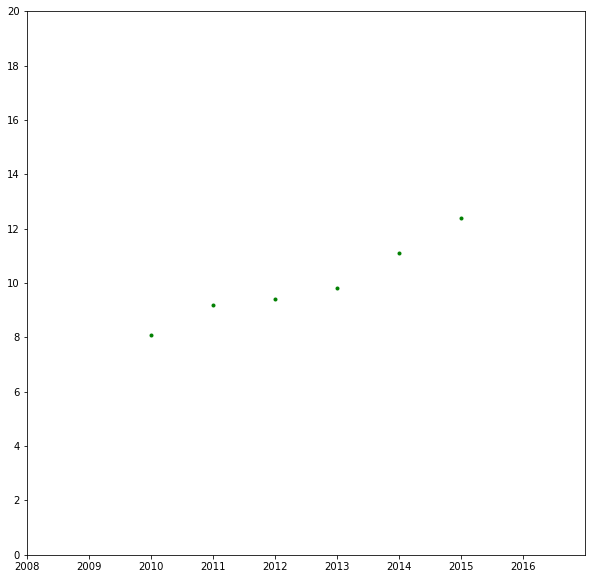

In [4]:
# voorbeeldscript
# puntenwolk
plt.figure(figsize=(10,10))                         # creëer tekenvenster

plt.axis(xmin=2008, xmax=2017, ymin=0, ymax=20)     # vensterinstellingen  
plt.xticks(np.arange(2008, 2017, step=1))
plt.yticks(np.arange(0, 21, step=2))

plt.scatter(x, y, color="green", marker=".")    # plot puntenwolk

plt.show()                                          # toon grafiek

<div>
    <font color=#690027 markdown="1">  
        <h2>2. De correlatiecoëfficiënt</h2> 
    </font>
</div>

In [5]:
#voorbeeldscript
print("Correlatiecoëfficiënt R =", np.corrcoef(x, y)[0,1])     # 0 wijst op eerste rij en 1 op tweede kolom

Correlatiecoëfficiënt R = 0.9677362246712373


Interpretatie: De punten in het spreidingsdiagram lijken ruwweg op een rechte te liggen. Samen met de waarde van de correlatiecoëfficiënt wijst dit op een *positieve zeer sterke lineaire samenhang*. 

Bij de brieven bedraagt de correlatiecoëfficiënt ongveer $-0,999$, hier bij de postpakken $0,968$. Dat betekent dat er meer samenhang is tusen de brieven en het jaartal in vergelijking met de postpakken en het jaartal.

<div>
    <font color=#690027 markdown="1">  
        <h2>3. Lineaire regressie</h2> 
    </font>
</div>

In [6]:
# voorbeeldscript
# regressielijn is rechte

# ingeven hoe vergelijking rechte is opgebouwd 
def rechte(x, a, b):
    """Voorschrift (schuine) rechte met variabele x en coëfficiënten a en b."""
    return a * x + b

# rechte zoeken die beste past bij bepaalde data, vergelijking tonen en 'onthouden'
def linreg(x, y):
    """Rechte best passend bij datapunten x en y."""
    popt, pcov = curve_fit(rechte, x, y)            # curve_fit() kijkt in def rechte() hoe functievoorschrift eruit ziet
    # curve_fit() geeft twee zaken terug, waaraan gerefereerd wordt met popt en pcov
    # enkel eerste nodig, die a en b van gezochte rechte geeft
    a, b = popt                                     # coëfficiënten
    print("y = ", a, "x +", b)                      # toon vergelijking regressielijn
    return a, b                          # geeft coëfficiënten terug van vergelijking regressielijn

In [7]:
# voorbeeldscript
# coëfficiënten regressielijn bij gegeven punten
a, b = linreg(x, y)                

y =  0.7885714285709415 x + -1577.0000000033897


<div>
    <font color=#690027 markdown="1">  
        <h2>4. Grafiek</h2> 
    </font>
</div>

In [8]:
# voorbeeldscript
# extra x-waarden
x_regressielijn = np.arange(2010, 2030, 1)
y_regressielijn = rechte(x_regressielijn, a, b)    # y_regressielijn verwijst naar lijst y-waarden van punten gelegen op regressielijn

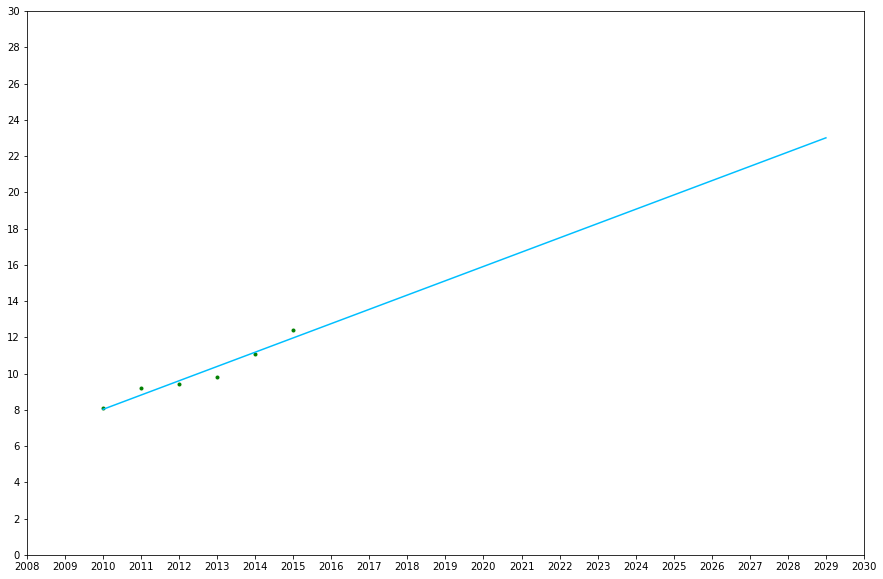

In [9]:
# voorbeeldscript
# grafiek puntenwolk samen met trendlijn

plt.figure(figsize=(15,10))                       # creëer tekenvenster

plt.axis(xmin=2008, xmax=2017, ymin=0, ymax=20)  # vensterinstellingen  
plt.xticks(np.arange(2008, 2031, step=1))
plt.yticks(np.arange(0, 31, step=2))
                        
plt.scatter(x, y, color="green", marker=".")      # plot puntenwolk     

plt.plot(x_regressielijn, y_regressielijn, color="deepskyblue")   # plot regressielijn

plt.show()                                          # toon grafiek

<div>
    <h2>Referentielijst</h2> 
</div>

[1] tlb, mtm. (21 februari 2017). Postbode komt niet meer elke dag aan huis. *Het Nieuwsblad*. https://www.nieuwsblad.be/cnt/dmf20170220_02742099

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook Python in wiskunde, zie Computationeel denken - Programmeren in Python van <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière, in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 